In [33]:
import pandas as pd 
import numpy as np
import pylab as pl
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
from scikitlearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn import metrics
from IPython.display import display, clear_output
import ipywidgets as widgets
import itertools
%matplotlib inline 

# DATA PROCESSING 

In [9]:
data = pd.read_csv("heart.csv")
data["Sex"].replace({"M":1,"F":0}, inplace = True )
data["ST_Slope"].replace({"Up":1,"Flat":0,"Down":-1,}, inplace = True)
data["RestingECG"].replace({"Normal":0,"ST":1,"LVH":-1,}, inplace = True)
data["ChestPainType"].replace({"ASY":0,"ATA":2,"NAP":-1,"TA":1}, inplace = True)
model_data = data[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak','ST_Slope','HeartDisease']]
model_data['HeartDisease'] = model_data['HeartDisease'].astype('int')
X = model_data[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak','ST_Slope']]
Y = model_data['HeartDisease']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


# TRAIN TEST SPLIT 

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (734, 10) (734,)
Test set: (184, 10) (184,)


# LOGISTIC REGRESSION 

In [4]:
#tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
#accuracy : 0.8256130790190735
#Accuracy on test data is: 0.859

In [11]:
LR = LogisticRegression(C=1, penalty = 'l2',solver='lbfgs').fit(X_train,y_train)

In [12]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


### JACCARD SCORE 

In [13]:
#jaccard_score(y_test, yhat,pos_label=0)

### CONFUSION MATRIX

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[84 12]
 [14 74]]


Confusion matrix, without normalization
[[84 12]
 [14 74]]


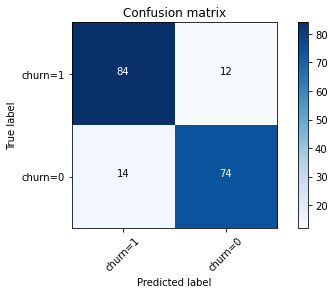

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### CLASSIFICATION REPORT 

In [16]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        88
           1       0.86      0.88      0.87        96

   micro avg       0.86      0.86      0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [17]:
#LOG LOSS : 

log_loss(y_test, yhat_prob)

0.40241757436049463

Text(0.5, 1.0, 'REAL LABELS')

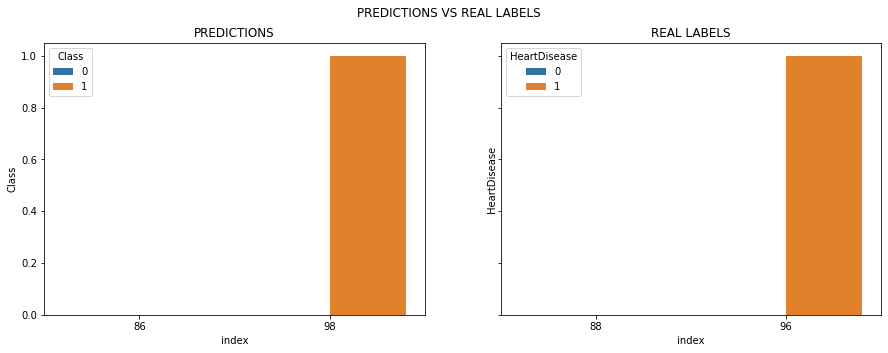

In [18]:
yhat_df =  pd.DataFrame(yhat, columns=['Class']).reset_index()
ytest_df = pd.DataFrame(y_test)
ytest_df = ytest_df.reset_index()
yhat_bins = yhat_df.groupby('Class').count().reset_index()
ytest_bins = ytest_df.groupby('HeartDisease').count().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('PREDICTIONS VS REAL LABELS')

sns.barplot(data=yhat_bins,ax=axes[0],x="index", y="Class",hue="Class")
axes[0].set_title('PREDICTIONS')
sns.barplot(data=ytest_bins,ax=axes[1], x="index", y="HeartDisease",hue="HeartDisease")
axes[1].set_title('REAL LABELS')

# KNN IMPLEMENTATION

In [19]:
#tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
# train accuracy : 0.8637602179836512
# Accuracy on test data is: 0.875
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(algorithm='auto',n_neighbors = n,p=1).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

array([0.79, 0.81, 0.86, 0.85, 0.88, 0.89, 0.87, 0.88, 0.87])

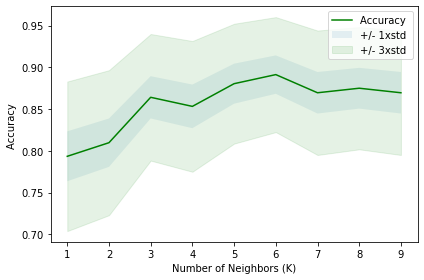

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
k=6 
neigh = KNeighborsClassifier(algorithm='auto',n_neighbors = k,p=1).fit(X_train,y_train)
yhat2 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.8828337874659401
Test set Accuracy:  0.8913043478260869


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


Confusion matrix, without normalization
[[90  6]
 [14 74]]


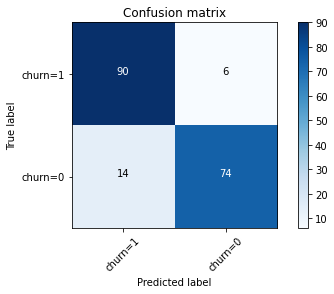

In [23]:
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [24]:
print (classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        88
           1       0.87      0.94      0.90        96

   micro avg       0.89      0.89      0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



Text(0.5, 1.0, 'REAL LABELS')

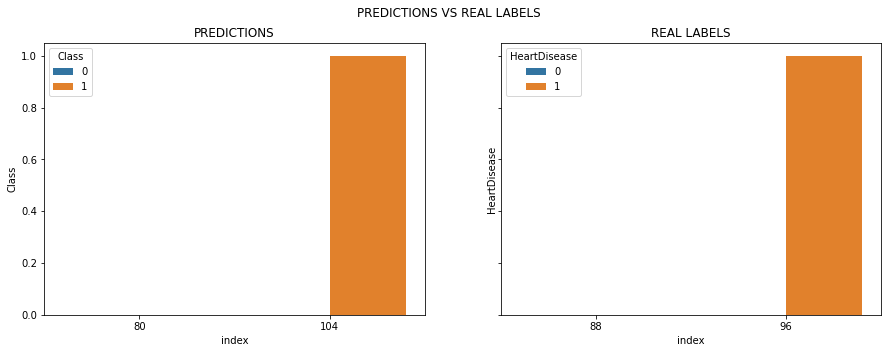

In [25]:
yhat_df =  pd.DataFrame(yhat2, columns=['Class']).reset_index()
ytest_df = pd.DataFrame(y_test)
ytest_df = ytest_df.reset_index()

yhat_bins = yhat_df.groupby('Class').count().reset_index()
ytest_bins = ytest_df.groupby('HeartDisease').count().reset_index()






fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('PREDICTIONS VS REAL LABELS')

sns.barplot(data=yhat_bins,ax=axes[0],x="index", y="Class",hue="Class")
axes[0].set_title('PREDICTIONS')

 
sns.barplot(data=ytest_bins,ax=axes[1], x="index", y="HeartDisease",hue="HeartDisease")
axes[1].set_title('REAL LABELS')

# DESICION TREE IMPLEMENTATION

In [26]:
#tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
#accuracy : 0.8419618528610354
#Accuracy on test data is: 0.837

dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6,max_features='auto',min_samples_leaf=2,min_samples_split = 10, splitter = 'best')
dTree.fit(X_train,y_train)
PredTree = dTree.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [ ]:
cnf_matrix = confusion_matrix(y_test, PredTree, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [27]:
print (classification_report(y_test, PredTree))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        88
           1       0.74      0.92      0.82        96

   micro avg       0.79      0.79      0.79       184
   macro avg       0.81      0.78      0.78       184
weighted avg       0.81      0.79      0.78       184



# SUPPORT VECTOR MACHINE IMPLEMENTATION

In [50]:
#parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
             #'C': np.logspace(-3, 3, 5),
             #'gamma':np.logspace(-3, 3, 5)}

# define the model
svm0 = svm.SVC(kernel='rbf')
svm_cv = svm0.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.78      0.82        88
           1       0.82      0.88      0.84        96

   micro avg       0.83      0.83      0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Confusion matrix, without normalization
[[90  6]
 [14 74]]


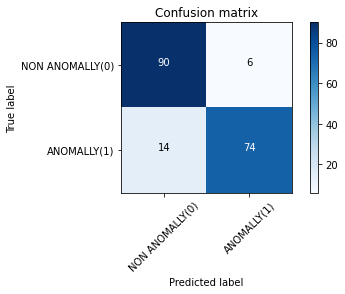

In [51]:
yhat_svm = svm_cv.predict(X_test)
SVM_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat_svm))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NON ANOMALLY(0)','ANOMALLY(1)'],normalize= False,  title='Confusion matrix')



# BEST IMPLEMENTATION IS KNN

In [52]:
k=6 
neigh = KNeighborsClassifier(algorithm='auto',n_neighbors = k,p=1).fit(X_train,y_train)
yhat2 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.8828337874659401
Test set Accuracy:  0.8913043478260869


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [53]:
print (classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        88
           1       0.87      0.94      0.90        96

   micro avg       0.89      0.89      0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

